C:\Users\igorh\AppData\Local\Temp\ipykernel_14928\1697971014.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_odors.index, y=top_odors.values, palette='viridis')


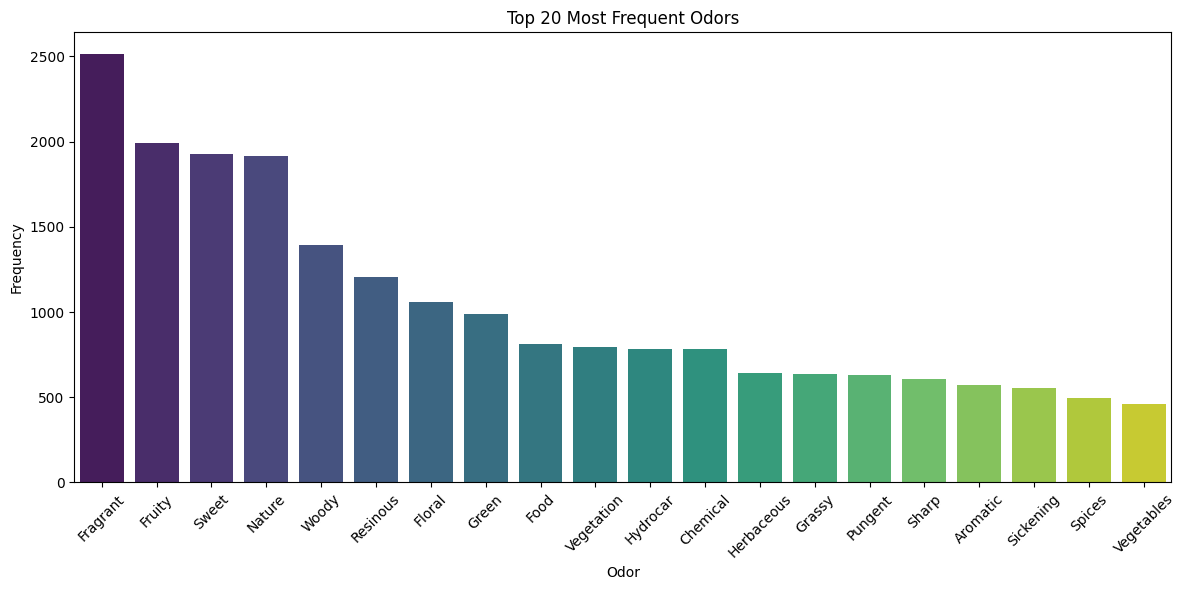

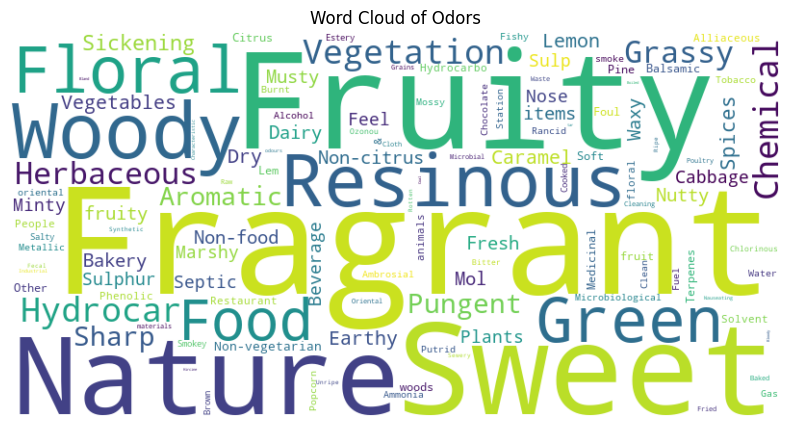

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Load the data
file_path = r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv'
data = pd.read_csv(file_path)

# Step 2: Calculate odor frequencies
odor_columns = [col for col in data.columns if col.startswith('odor_')]
all_odors = data[odor_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1).str.split()
all_odors_flat = [item for sublist in all_odors for item in sublist]
odor_freq = pd.Series(all_odors_flat).value_counts()

# Step 3: Filter top 20 odors
top_n = 20
top_odors = odor_freq.head(top_n)

# Step 4: Plot bar chart and histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=top_odors.index, y=top_odors.values, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Odors')
plt.xlabel('Odor')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Step 5: Create word cloud (optional)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(odor_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Odors')
plt.show()


Scaffold: c1ccccc1
Number of Compounds: 6013
Top Odors: ['Fragrant', 'Nature', 'Sweet']
---
Scaffold: C1CCCCC1
Number of Compounds: 946
Top Odors: ['Fragrant', 'Sweet', 'Nature']
---
Scaffold: C(=CC1OCCO1)c1ccccc1
Number of Compounds: 5
Top Odors: ['Food', 'Spices', 'Sweet']
---
Scaffold: C12=C3C4C1=C1C2C3C14
Number of Compounds: 6
Top Odors: ['Food', 'Fruity', 'Nature']
---
Scaffold: C1=CC2COCC2CCCCCCCC1
Number of Compounds: 10
Top Odors: ['Ambrosial', 'Earthy', 'Pungent']
---
Scaffold: C1=CCOC=C1
Number of Compounds: 6
Top Odors: ['Smokey', 'Woody', 'Resinous']
---
Scaffold: C1=NCCC1
Number of Compounds: 16
Top Odors: ['Fishy', 'Food', 'Ammonia']
---
Scaffold: C1CC2C3CC(C2C1)C1(CCCO1)C3
Number of Compounds: 9
Top Odors: ['Fruity', 'Nature', 'Vegetables']
---
Scaffold: C1CCC(SSC2CCCCC2)CC1
Number of Compounds: 12
Top Odors: ['Septic', 'Food', 'Vegetables']
---
Scaffold: C1CCCC2(CCC1)CCCO2
Number of Compounds: 9
Top Odors: ['Fuel', 'Hydrocarbo', 'Woody']
---
Scaffold: C1CCCCCC2COCC2CCC

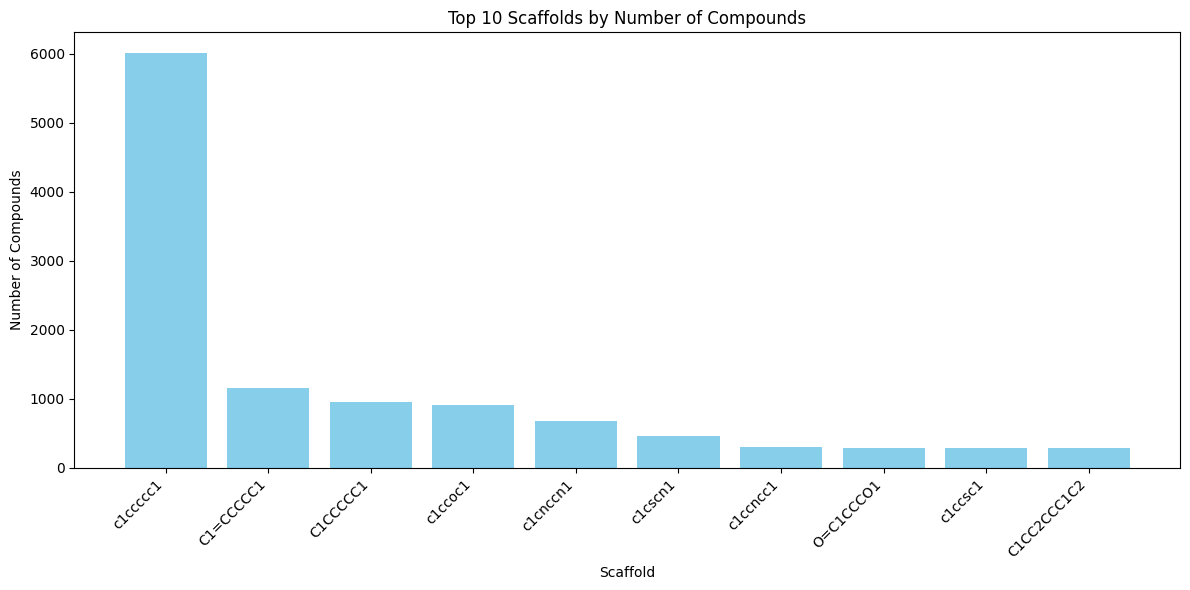

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Load and prepare data (replace with your data loading logic)
file_path = r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv'
data = pd.read_csv(file_path)

# Example: Assume 'standardized_smiles' and 'odor_1' columns exist
smiles_data = data['standardized_smiles']
odor_columns = [col for col in data.columns if col.startswith('odor_')]
odors_data = data[odor_columns]

# Step 2: Function to extract scaffold from SMILES using RDKit
def extract_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    return scaffold

# Step 3: Extract scaffolds and collect associated odors
scaffold_odors = defaultdict(list)

for smiles, row in zip(smiles_data, odors_data.itertuples()):
    scaffold = extract_scaffold(smiles)
    if scaffold:
        for odor_col in odor_columns:
            odor = getattr(row, odor_col)
            if pd.notna(odor):
                scaffold_odors[scaffold].append(odor)

# Step 4: Analyze and summarize scaffold-odor relationships
scaffold_summary = {}

for scaffold, odors in scaffold_odors.items():
    odor_count = len(odors)
    top_odors = pd.Series(odors).value_counts().index.tolist()[:3]  # Top 3 most frequent odors
    scaffold_summary[scaffold] = {
        'Count': odor_count,
        'Top Odors': top_odors
    }

# Step 5: Print or visualize scaffold analysis results
for scaffold, info in scaffold_summary.items():
    print(f"Scaffold: {scaffold}")
    print(f"Number of Compounds: {info['Count']}")
    print(f"Top Odors: {info['Top Odors']}")
    print("---")

# Step 6: Visualize scaffold analysis results (example: bar plot of scaffold counts)
scaffold_counts = {scaffold: info['Count'] for scaffold, info in scaffold_summary.items()}
sorted_scaffolds = sorted(scaffold_counts.items(), key=lambda x: x[1], reverse=True)
top_scaffolds = dict(sorted_scaffolds[:10])  # Visualize top 10 scaffolds by count

plt.figure(figsize=(12, 6))
plt.bar(top_scaffolds.keys(), top_scaffolds.values(), color='skyblue')
plt.xlabel('Scaffold')
plt.ylabel('Number of Compounds')
plt.title('Top 10 Scaffolds by Number of Compounds')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


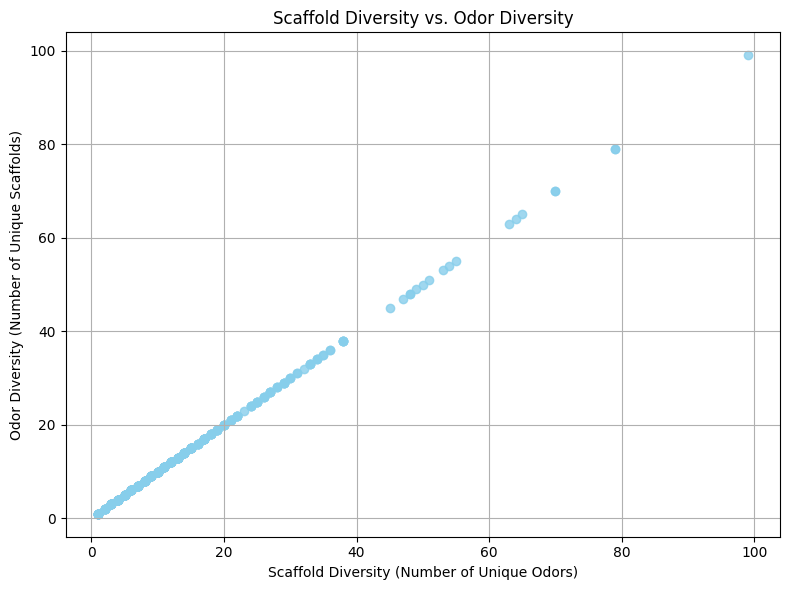

In [14]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Load and prepare data (replace with your data loading logic)
file_path = r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv'
data = pd.read_csv(file_path)

# Example: Assume 'standardized_smiles' and 'odor_1' columns exist
smiles_data = data['standardized_smiles']
odor_columns = [col for col in data.columns if col.startswith('odor_')]
odors_data = data[odor_columns]

# Step 2: Function to extract scaffold from SMILES using RDKit
def extract_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    return scaffold

# Step 3: Extract scaffolds and collect associated odors
scaffold_odors = defaultdict(list)

for smiles, row in zip(smiles_data, odors_data.itertuples()):
    scaffold = extract_scaffold(smiles)
    if scaffold:
        for odor_col in odor_columns:
            odor = getattr(row, odor_col)
            if pd.notna(odor):
                scaffold_odors[scaffold].append(odor)

# Step 4: Calculate scaffold and odor diversity
scaffold_diversity = {}
odor_diversity = {}

for scaffold, odors in scaffold_odors.items():
    scaffold_diversity[scaffold] = len(set(odors))
    odor_diversity[scaffold] = len(set(scaffold_odors[scaffold]))

# Step 5: Visualize scaffold diversity vs. odor diversity
scaffold_diversity_values = list(scaffold_diversity.values())
odor_diversity_values = list(odor_diversity.values())

plt.figure(figsize=(8, 6))
plt.scatter(scaffold_diversity_values, odor_diversity_values, alpha=0.8, color='skyblue')
plt.title('Scaffold Diversity vs. Odor Diversity')
plt.xlabel('Scaffold Diversity (Number of Unique Odors)')
plt.ylabel('Odor Diversity (Number of Unique Scaffolds)')
plt.grid(True)
plt.tight_layout()
plt.show()


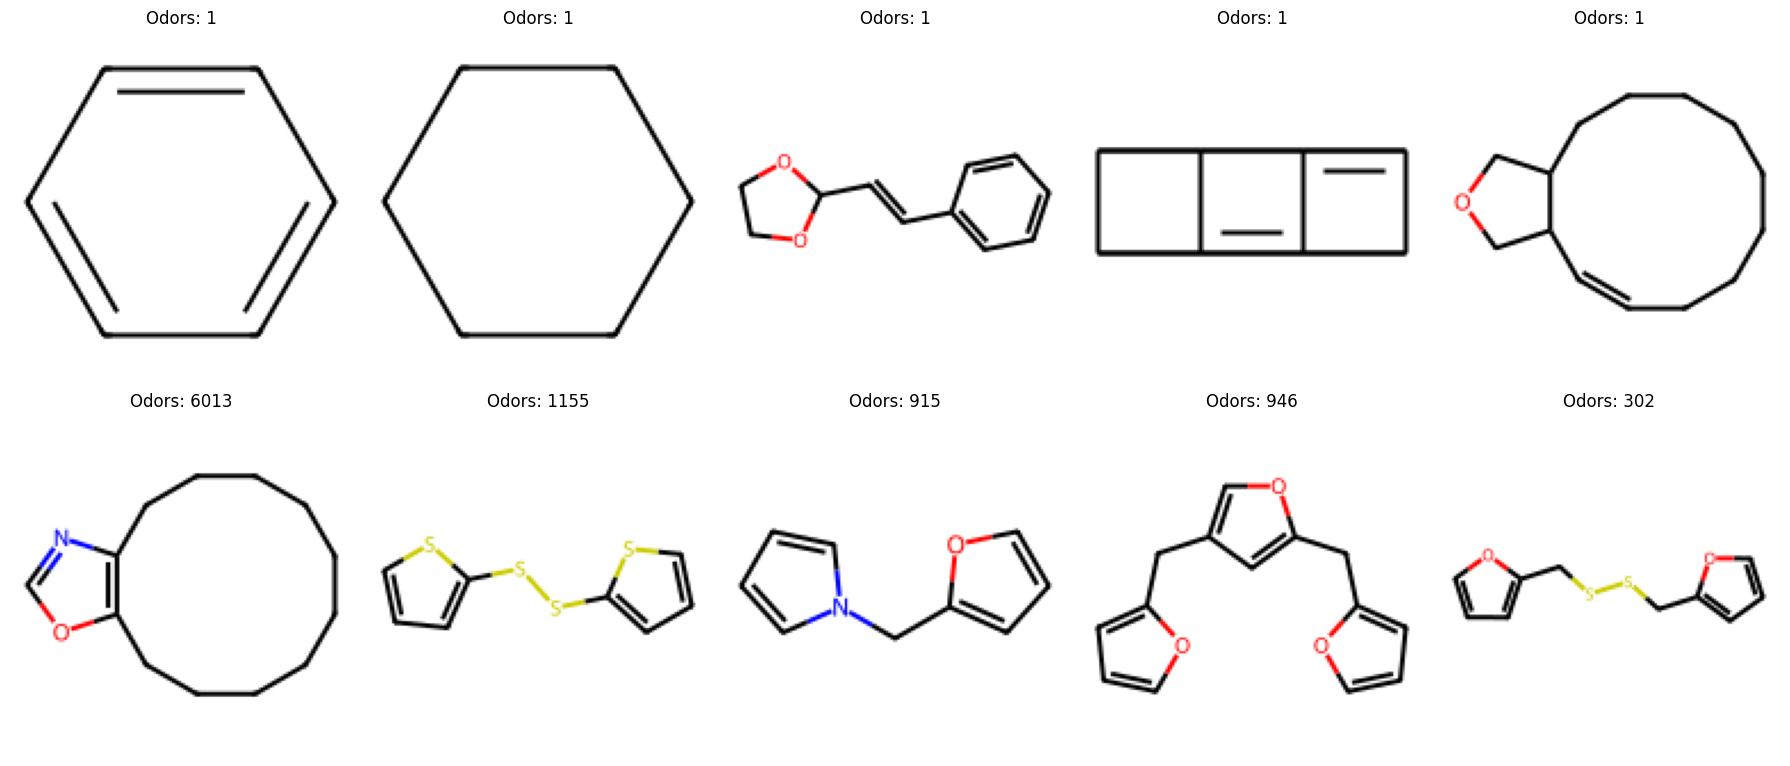

In [31]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Load and prepare data (replace with your data loading logic)
file_path = r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv'
data = pd.read_csv(file_path)

# Example: Assume 'standardized_smiles' and 'odor_1' to 'odor_3' columns exist
smiles_data = data['standardized_smiles']
odor_columns = [col for col in data.columns if col.startswith('odor_')]
odors_data = data[odor_columns]

# Step 2: Function to extract scaffold from SMILES using RDKit
def extract_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
    return scaffold

# Step 3: Extract scaffolds and collect associated odors
scaffold_odors = defaultdict(list)

for smiles, row in zip(smiles_data, odors_data.itertuples()):
    scaffold = extract_scaffold(smiles)
    if scaffold:
        for odor_col in odor_columns:
            odor = getattr(row, odor_col)
            if pd.notna(odor):
                scaffold_odors[scaffold].append(odor)

# Step 4: Calculate scaffold diversity (number of unique odors)
scaffold_diversity = {scaffold: len(set(odors)) for scaffold, odors in scaffold_odors.items()}

# Step 5: Find scaffolds with the most and least odors
scaffolds_least_odors = sorted(scaffold_diversity, key=scaffold_diversity.get)[:5]
scaffolds_most_odors = sorted(scaffold_diversity, key=scaffold_diversity.get, reverse=True)[:5]

# Step 6: Plotting the images and odors in a grid
def plot_molecule_with_odors(smiles, odors, ax):
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(150, 150))
    ax.imshow(img)
    ax.set_title(f'Odors: {len(odors)}')
    ax.axis('off')

# Create a 2x5 grid for plotting
fig, axs = plt.subplots(2, 5, figsize=(18, 8))

# Plot scaffolds with the least amount of odors
for i, scaffold in enumerate(scaffolds_least_odors):
    smiles = list(scaffold_odors.keys())[i]  # Assuming scaffolds are keys in scaffold_odors
    odors = scaffold_odors[scaffold]
    plot_molecule_with_odors(smiles, odors, axs[0, i])

# Plot scaffolds with the most amount of odors
for i, scaffold in enumerate(scaffolds_most_odors):
    smiles = list(scaffold_odors.keys())[-(i+1)]  # Assuming scaffolds are keys in scaffold_odors
    odors = scaffold_odors[scaffold]
    plot_molecule_with_odors(smiles, odors, axs[1, i])

plt.tight_layout()
plt.show()

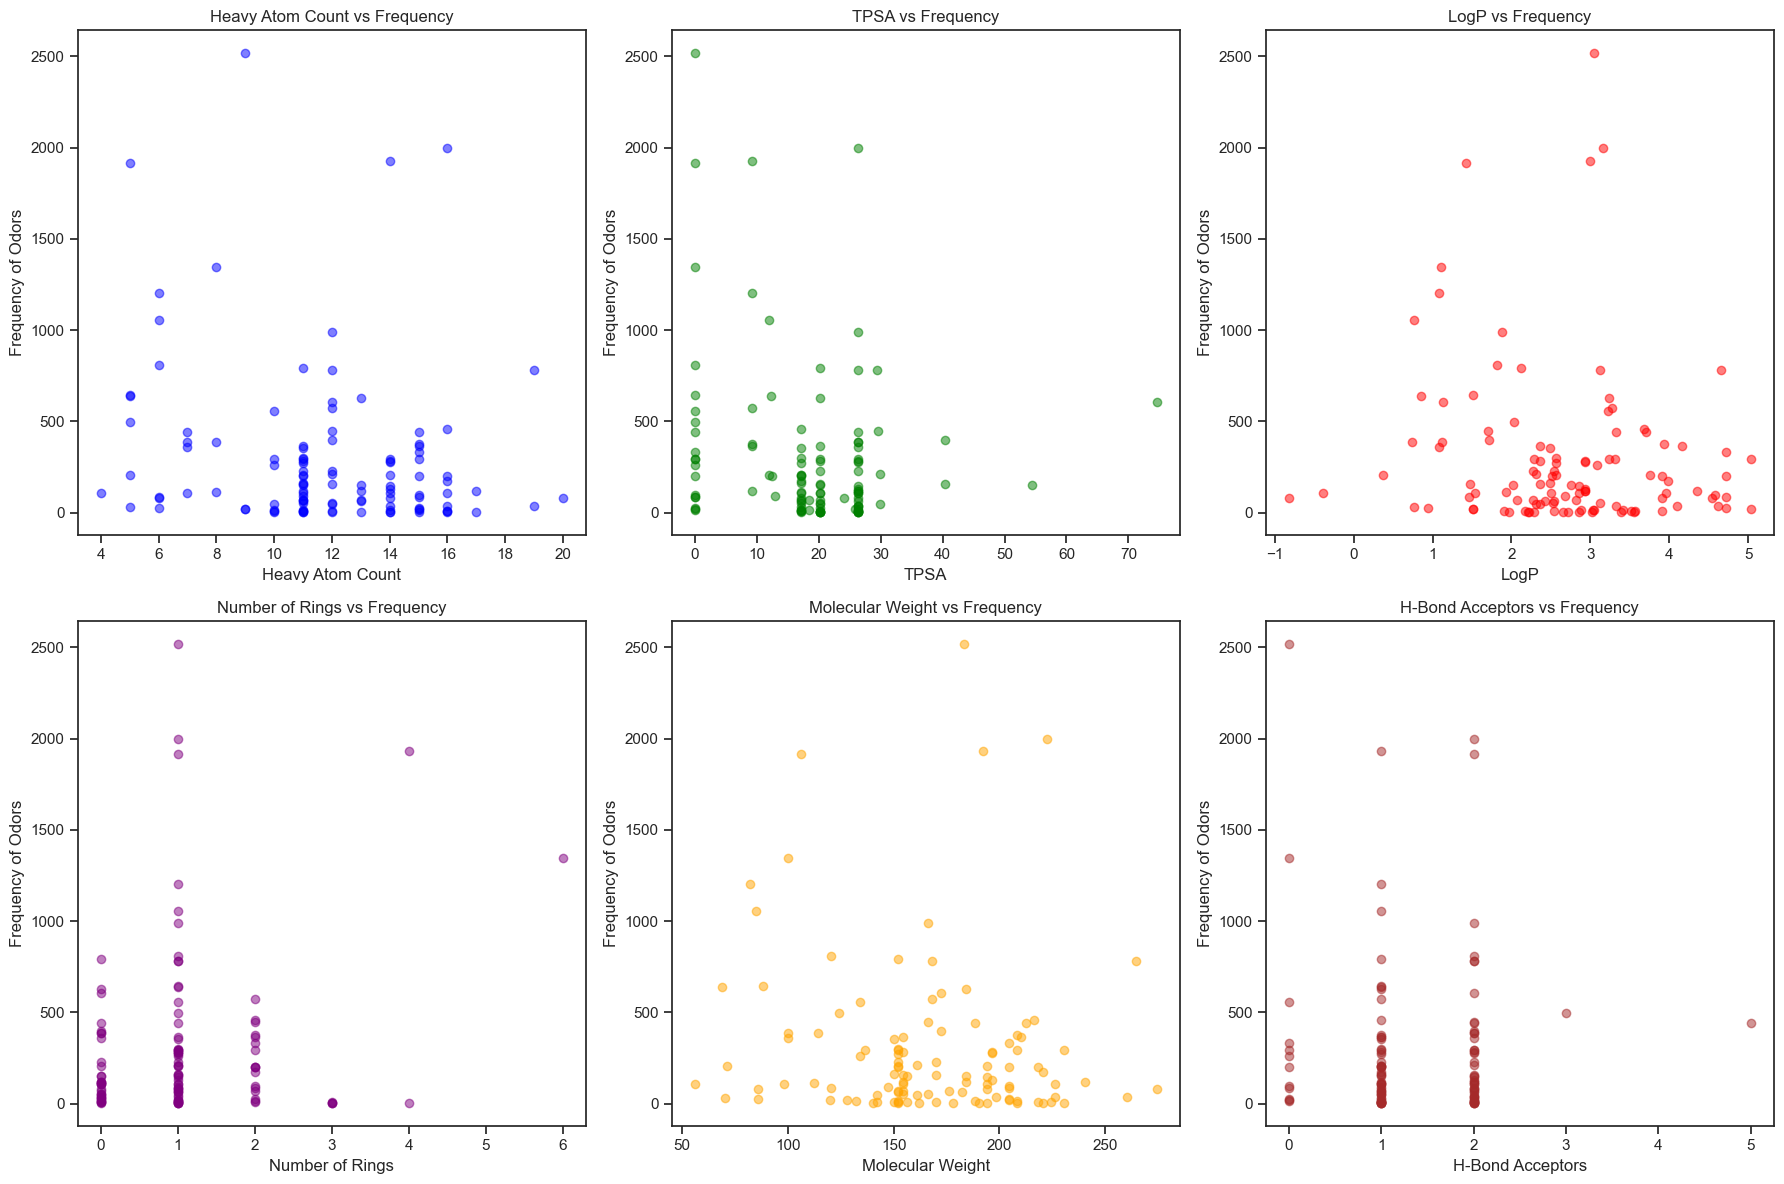

In [68]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

# Load and prepare data (replace with your data loading logic)
file_path = r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv'
data = pd.read_csv(file_path)

# Example: Assume 'standardized_smiles' and 'odor_1' to 'odor_3' columns exist
smiles_data = data['standardized_smiles']
odor_columns = [col for col in data.columns if col.startswith('odor_')]
odors_data = data[odor_columns]

# Function to calculate properties
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None, None, None, None, None
    heavy_atom_count = Descriptors.HeavyAtomCount(mol)
    tpsa = Descriptors.TPSA(mol)
    logp = Descriptors.MolLogP(mol)
    rings = Chem.Descriptors.RingCount(mol)
    mw = Descriptors.MolWt(mol)
    hba = Descriptors.NumHAcceptors(mol)  # New property: Number of Hydrogen Bond Acceptors
    return heavy_atom_count, tpsa, logp, rings, mw, hba

# Extract properties
properties = []
odor_frequencies = {}

for smiles, row in zip(smiles_data, odors_data.itertuples()):
    heavy_atom_count, tpsa, logp, rings, mw, hba = calculate_properties(smiles)
    if mw is not None:
        properties.append({
            'HeavyAtomCount': heavy_atom_count,
            'TPSA': tpsa,
            'LogP': logp,
            'NumRings': rings,
            'MolecularWeight': mw,
            'HBA': hba
        })
        for odor_col in odor_columns:
            odor = getattr(row, odor_col)
            if pd.notna(odor):
                if odor not in odor_frequencies:
                    odor_frequencies[odor] = 0
                odor_frequencies[odor] += 1

# Create DataFrame
properties_df = pd.DataFrame(properties)
odor_freq_df = pd.DataFrame(list(odor_frequencies.items()), columns=['Odor', 'Frequency'])

# Merge DataFrames
merged_df = pd.merge(properties_df, odor_freq_df, left_index=True, right_index=True, how='inner')

# Plotting in a grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot Heavy Atom Count vs Frequency
axes[0, 0].scatter(merged_df['HeavyAtomCount'], merged_df['Frequency'], color='blue', alpha=0.5)
axes[0, 0].set_xlabel('Heavy Atom Count')
axes[0, 0].set_ylabel('Frequency of Odors')
axes[0, 0].set_title('Heavy Atom Count vs Frequency')

# Plot TPSA vs Frequency
axes[0, 1].scatter(merged_df['TPSA'], merged_df['Frequency'], color='green', alpha=0.5)
axes[0, 1].set_xlabel('TPSA')
axes[0, 1].set_ylabel('Frequency of Odors')
axes[0, 1].set_title('TPSA vs Frequency')

# Plot LogP vs Frequency
axes[0, 2].scatter(merged_df['LogP'], merged_df['Frequency'], color='red', alpha=0.5)
axes[0, 2].set_xlabel('LogP')
axes[0, 2].set_ylabel('Frequency of Odors')
axes[0, 2].set_title('LogP vs Frequency')

# Plot Number of Rings vs Frequency
axes[1, 0].scatter(merged_df['NumRings'], merged_df['Frequency'], color='purple', alpha=0.5)
axes[1, 0].set_xlabel('Number of Rings')
axes[1, 0].set_ylabel('Frequency of Odors')
axes[1, 0].set_title('Number of Rings vs Frequency')

# Plot Molecular Weight vs Frequency
axes[1, 1].scatter(merged_df['MolecularWeight'], merged_df['Frequency'], color='orange', alpha=0.5)
axes[1, 1].set_xlabel('Molecular Weight')
axes[1, 1].set_ylabel('Frequency of Odors')
axes[1, 1].set_title('Molecular Weight vs Frequency')

# Plot HBA vs Frequency
axes[1, 2].scatter(merged_df['HBA'], merged_df['Frequency'], color='brown', alpha=0.5)
axes[1, 2].set_xlabel('H-Bond Acceptors')
axes[1, 2].set_ylabel('Frequency of Odors')
axes[1, 2].set_title('H-Bond Acceptors vs Frequency')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Load CSV into DataFrame
df = pd.read_csv(r'C:\Users\igorh\Documents\SOFIA_MQ\data\curated_PrimaryOdor.csv')

# Function to extract scaffolds using RDKit
def extract_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    return Chem.MolToSmiles(scaffold)

# Apply scaffold extraction to each SMILES in the dataset
df['scaffold'] = df['standardized_smiles'].apply(extract_scaffold)

# Create a new DataFrame for scaffolds and labels
scaffold_df = pd.DataFrame()

# Copy scaffolds to new DataFrame
scaffold_df['scaffold'] = df['scaffold']

# Maintain labels per scaffold in different columns (e.g., odor_1, odor_2, ...)
for i in range(1, 6):  # Assuming there are up to 5 odor columns
    col_name = f'odor_{i+1}'
    scaffold_df[col_name] = df[col_name]

# Display the scaffold DataFrame
print(scaffold_df.head())


   scaffold    odor_2      odor_3    odor_4         odor_5    odor_6
0  c1ccccc1  Fragrant  Vegetation     Green         Fruity       NaN
1                 Dry   Ambrosial     Woody           Waxy  Resinous
2  C1CCCCC1       Dry  Vegetation  Aromatic          Woody     Nutty
3  C1CCCCC1       Dry  Vegetation     Woody  Soft oriental  Resinous
4            Fragrant      Floral    Nature            NaN       NaN


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load your dataset containing SMILES representations
df = scaffold_df

# Function to generate Morgan fingerprints from SMILES
def smiles_to_fp(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  # Morgan fingerprint, radius=2, 1024 bits
    return np.array(fp)

# Apply smiles_to_fp function to each SMILES in the dataset
df['fp'] = df['scaffold'].apply(smiles_to_fp)

# Convert fingerprints to numpy array
X = np.array(df['fp'].tolist())

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determine top 5 most common odors
top_n = 5
odor_columns = [col for col in df.columns if col.startswith('odor_')]
odor_counts = df[odor_columns].apply(pd.Series.value_counts).sum(axis=1)
top_odors = odor_counts.nlargest(top_n).index.tolist()

# Group data points by top 5 odors using K-means clustering as an example
odor_groups = {}
for odor in top_odors:
    label_indices = df['combined_odors'].str.contains(odor)
    X_label = X_pca[label_indices]
    odor_groups[odor] = X_label

# Define colors for plotting outlines
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot PCA results with gray points and smoother outlines for each top odor
plt.figure(figsize=(10, 8))

# Plot gray points
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='gray', alpha=0.5, label='Other Odors')

# Plot smoother outlines for each top odor
for i, (odor, X_label) in enumerate(odor_groups.items()):
    # Calculate convex hull for the group
    hull = ConvexHull(X_label)

    # Extract points from convex hull
    points = X_label[hull.vertices]

    # Duplicate the last point to close the outline
    points = np.vstack([points, points[0]])

    # Interpolate between points for smoother outline
    t = np.arange(points.shape[0])
    interp = np.linspace(0, t.max(), 100)
    x_vals = np.interp(interp, t, points[:, 0])
    y_vals = np.interp(interp, t, points[:, 1])

    # Plot the interpolated outline
    plt.plot(x_vals, y_vals, color=colors[i], alpha=0.5, label=odor)

# Create legend for top 5 odors
legend_handles = []
for i, odor in enumerate(top_odors):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=odor))

# Add legend
plt.legend(handles=legend_handles, title='Top 5 Odors', loc='upper right')

plt.title('Principal Odor Map with Smoother Outlines by Top 5 Most Common Odors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerator
[13:32:50] DEPRECATION WARNING: please use MorganGenerat

KeyError: 'combined_odors'

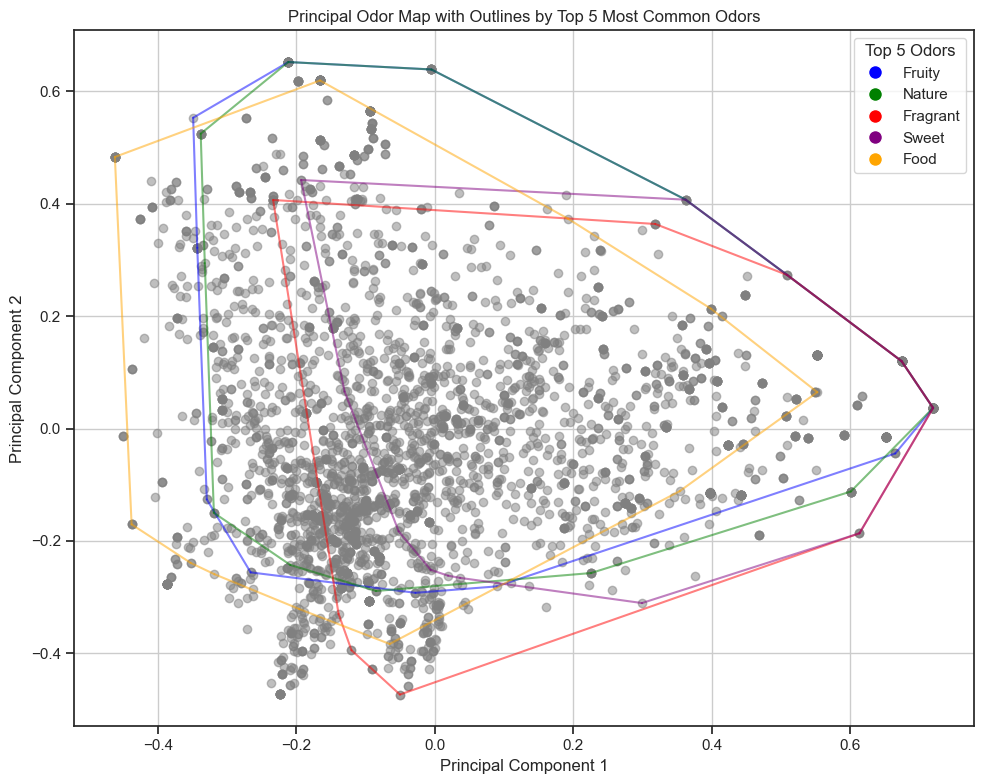

In [113]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load CSV into DataFrame
df = scaffold_df

# Assuming 'odor_1', 'odor_2', etc., are columns containing odor descriptions
odor_columns = [col for col in df.columns if col.startswith('odor_')]

# Concatenate odor columns into a single text column for vectorization
df['combined_odors'] = df[odor_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Vectorize odors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_odors'])

# Apply PCA
pca = PCA(n_components=2)
odor_pca = pca.fit_transform(X.toarray())

# Determine top 5 most common odors
top_n = 5
odor_counts = df[odor_columns].apply(pd.Series.value_counts).sum(axis=1)
top_odors = odor_counts.nlargest(top_n).index.tolist()

# Group data points by top 5 odors using K-means clustering as an example
odor_groups = {}
for odor in top_odors:
    label_indices = df['combined_odors'].str.contains(odor)
    X_label = odor_pca[label_indices]
    odor_groups[odor] = X_label

# Define colors for plotting outlines
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot PCA results with gray points and outlines for each top odor
plt.figure(figsize=(10, 8))

# Plot gray points
plt.scatter(odor_pca[:, 0], odor_pca[:, 1], color='gray', alpha=0.5, label='Other Odors')

# Plot outlines for each top odor
for i, (odor, X_label) in enumerate(odor_groups.items()):
    # Calculate convex hull for the group
    hull = ConvexHull(X_label)

    # Plot the convex hull
    for simplex in hull.simplices:
        plt.plot(X_label[simplex, 0], X_label[simplex, 1], color=colors[i], alpha=0.5, label=odor)

# Create legend for top 5 odors
legend_handles = []
for i, odor in enumerate(top_odors):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=odor))

# Add legend
plt.legend(handles=legend_handles, title='Top 5 Odors', loc='upper right')

plt.title('Principal Odor Map with Outlines by Top 5 Most Common Odors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
